In [ ]:
### PREAMBLE
# "Unsupervised learning&#58; clustering and dimensionality reduction"
# unsupervised.svg

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Aprendizaje no supervisado

Hasta ahora, hemos presentado los métodos de aprendizaje automático en gran parte en el contexto del aprendizaje supervisado. Esto significa que hablamos de que los conjuntos de datos de aprendizaje automático tienen entradas x , salidas y , y el objetivo de un algoritmo de aprendizaje automático es aprender a predecir y a partir de x. El aprendizaje supervisado domina tradicionalmente la mayoría de las aplicaciones prácticas de la ciencia de los datos pero esta clase discutiremos los enfoques que difieren de esto. En particular, consideraremos la configuración del **aprendizaje no supervisado**. Aquí, no se nos dan los pares correspondientes de entrada/salida, sino que sólo se nos dan las entradas x . Por supuesto, esto plantea la pregunta obvia: **si no se nos da una salida objetivo**, ¿qué se supone que debemos predecir exactamente? Y de hecho, la tarea de aprendizaje sin supervisión es ambigua en algún nivel. Sin embargo, la filosofía general del **aprendizaje no supervisado es que queremos descubrir algún tipo de estructura en los datos**. Los diferentes métodos de aprendizaje no supervisado funcionan de maneras muy diferentes, y descubren muy diferentes tipos de estructura, pero todos tienen este elemento similar.



Vamos a centrarnos aquí en definir primero el aprendizaje no supervisado de manera genérica, utilizando las mismas nociones de funciones de hipótesis, funciones de pérdida y procedimientos de optimización que utilizamos para el aprendizaje supervisado.  Resultará que a pesar del contexto muy diferente, prácticamente todos los métodos de aprendizaje no supervisado también pueden ser vistos de esta manera.  Pero naturalmente, la forma en que definimos las hipótesis y las funciones de pérdida tendrá que cambiar para tener en cuenta el hecho de que ya no tenemos un objetivo bien definido al que tratamos de ajustarnos.  Después de un aprendizaje no supervisado definido en este contexto genérico, describiremos dos algoritmos particulares de aprendizaje no supervisado e ilustraremos cómo encajan en este marco: el algoritmo de agrupación de k-medios y el algoritmo de análisis de componentes principales (PCA).


## Construir un algoritmo de aprendizaje no supervisado

Recordemos de nuestras presentaciones sobre el aprendizaje supervisado que los tres aspectos de un algoritmo de aprendizaje supervisado son: 

1.   Una función de hipótesis
2.   Una función de pérdida
3.   Un método para minimizar la pérdida media sobre los datos de entrenamiento.

## K-means clustering

Como nuestro primer ejemplo de un algoritmo de aprendizaje supervisado, vamos a considerar el algoritmo de agrupación de k-medias, para ver cómo encaja en el marco anterior. Antes de presentar el marco formal, sin embargo, vamos a considerar el cluster de *k-means* desde un punto de vista más visual/geométrico, como una forma de agrupar puntos de datos.

Consideremos el siguiente conjunto de 100 puntos de datos.


(-6.0, 6.0, -3.0, 3.0)

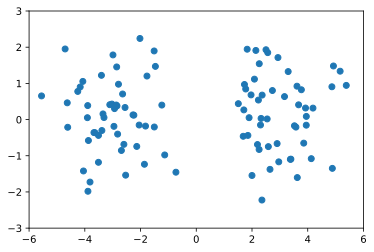

In [ ]:
# Fijamos números pseudoaleatorios
np.random.seed(0)

X1 = np.random.randn(50,2) + [-3, 0]
X2 = np.random.randn(50,2) + [3, 0]

X = np.vstack((X1, X2))

plt.scatter(X[:,0], X[:,1])
plt.axis([-6, 6, -3, 3])

Incluso si no miraras el código que generó estos puntos, debería ser bastante evidente que hay dos grupos de puntos diferentes aquí.   El objetivo del algoritmo de k-means es encontrar un conjunto de $k$ "centros" (es decir, puntos  $\mu^{(i)} \in \mathbb{R}^n$) de tal manera que cada punto de datos está cerca de al menos un centro.  Al hacerlo, también podemos asociar cada punto con su centro más cercano, y usar esto como una indicación de a qué cúmulo pertenece.  Veamos esto gráficamente para nuestro ejemplo anterior, usando el conocimiento de que generamos los datos para tener dos cúmulos explícitos.

(-6.0, 6.0, -3.0, 3.0)

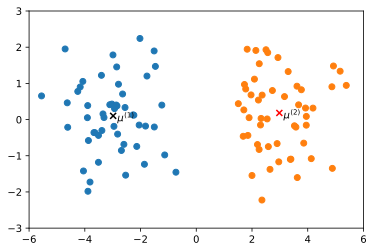

In [ ]:
np.random.seed(0)

X1 = np.random.randn(50,2) + [-3, 0]
X2 = np.random.randn(50,2) + [3, 0]

X = np.vstack((X1, X2))

plt.scatter(X[:50, 0], X[:50, 1], c="C0")
plt.scatter(X[50:, 0], X[50:, 1], c="C1")

# Calculamos la media
mu1 = X1.mean(axis=0)
mu2 = X2.mean(axis=0)

plt.scatter(mu1[0], mu1[1], marker="x", c="k")
plt.scatter(mu2[0], mu2[1], marker="x", c="r")

plt.text(mu1[0]+0.15, mu1[1]-0.15, "$\mu^{(1)}$")
plt.text(mu2[0]+0.15, mu2[1]-0.15, "$\mu^{(2)}$")

plt.axis([-6, 6, -3, 3])   

### Definición formal del algoritmo K-means
---

Veamos cómo funciona esto en el entorno formal que hemos descrito anteriormente.

**Función de hipótesis** Primero discutamos la función de hipótesis.  Los parámetros $\theta$ de nuestra función de hipótesis sólo incluyen los centros mismos.

\begin{equation}
\theta = \{\mu^{(1)}, \ldots, \mu^{(k)}\}
\end{equation}

Por cada  $\mu^{(i)} \in \mathbb{R}^n$ (observe que, como será un patrón a partir de ahora, seguimos refiriéndonos a _todos_ los parámetros de nuestra hipótesis usando la notación $\theta$, pero cada vez más esto se referirá a una colección de parámetros en lugar de un solo vector de parámetros). Definida por estos parámetros, la función de hipótesis en sí misma, $h_\theta(x)$, sólo _sale del centro que está más cerca del punto $x$_.  Escrito formalmente

\begin{equation}
\DeclareMathOperator*{argmin}{argmin}
h_\theta(x) = \argmin_{\mu \in \{\mu^{(1)}, \ldots, \mu^{(k)}\} } \|\mu - x\|_2^2
\end{equation}

where the $\argmin$ operator returns the argument that minimizes the expression (as opposed to the $\min$ operator which just returns the minimum value), i.e., the expression just outputs whichever center $\mu^{(1)},\ldots,\mu^{(k)}$ is closest to $x$.

Donde el operador $\argmin$ devuelve el argumento que minimiza la expresión (a diferencia del operador $\min$ que sólo devuelve el valor mínimo), es decir, la expresión sólo produce el centro $\mu^{(1)},\ldots,\mu^{(k)}$ que esté más cerca de $x$.

**Loss function** La función de pérdida usada por _k-means_ es simplemente la pérdida al cuadrado que mencionamos antes.

\begin{equation}
\ell(h_\theta(x), x) = \|h_\theta(x) - x\|_2^2.
\end{equation}

Recordando que la función de hipótesis simplemente produce la media más cercana al punto dado $x$, esto equivale a decir que la pérdida para cualquier punto es simplemente la distancia al cuadrado entre el centro más cercano y ese punto, es decir,

\begin{equation}
\ell(h_\theta(x), x) = \min_{\mu \in \{\mu^{(1)}, \ldots, \mu^{(k)}\}} \|\mu - x\|_2^2.
\end{equation}

**Optimization** Por último, consideremos ahora que el problema de la optimización que resulta de la hipótesis y la pérdida arriba mencionadas,

\begin{equation}
minimize_\theta \;\; \frac{1}{m} \sum_{i=1}^m \min_{\mu \in \{\mu^{(1)}, \ldots, \mu^{(k)}\}} \|\mu - x^{(i)}\|_2^2.
\end{equation}

A diferencia de los ajustes que hemos visto antes en el aprendizaje supervisado, en este caso no es estándar optimizar simplemente esta pérdida usando el descenso de gradiente (aunque enfatizamos que esto _podría_ hacerse).  En su lugar, una estrategia común es "asignar" iterativamente cada punto a su centro más cercano (es decir, calcular el término que alcanza los $\min$ para cada punto de entrenamiento), luego actualizar cada centro para que sea la media de estos puntos asignados (esta asignación es precisamente la que minimiza la pérdida asumiendo que las asignaciones de los centros son fijas), y repetir este proceso hasta la convergencia.  Esto a veces se llama algoritmo de Lloyd, pero más típicamente se le llama simplemente "k-means", ya que es el método estándar para el entrenamiento de los modelos k-means.  Hay muchas maneras de asignar inicialmente los centros de cúmulos, pero una estrategia común es simplemente elegir $k$ de los puntos de datos al azar.  Formalmente, el algoritmo procede de la siguiente manera.

<hr/>
**Algorithm**: K-means

**Given:** Data set $x^{(i)}, i=1,\ldots,m$

**Initialize:**
    
* $\mu^{(j)} := \mbox{RandomChoice}(x^{(1:m)}), \; j=1,\ldots,k$

**Repeat until convergence:**

* Assign point clusters: $y^{(i)} := \argmin_j \|\mu^{(j)} - x^{(i)}\|_2^2, \; i=1,\ldots,m$
* Compute new centers: $\displaystyle \mu^{(j)} := \sum_{i=1}^m \frac{x^{(i)} \mathrm{1}\{y^{(i)} = j\}}{\mathrm{1}\{y^{(i)} = j\}}, \;\; j=1,\ldots,k$

<hr/>

### Análisis de k-means

Veamos cómo funciona esto en la práctica. La siguiente es una implementación razonablemente eficiente del algoritmo. El aspecto clave que lo hace eficiente es que calculamos las distancias entre todos los puntos y todos los centros usando operaciones de matriz (la misma estrategia se usó anteriormente cuando creamos las características del RBF en nuestro entorno de clasificación no lineal).  Para simplificar, aquí ejecutamos el algoritmo para un número fijo de iteraciones en lugar de comprobar la convergencia explícitamente.

In [ ]:
def kmeans(X, k, max_iter=10, rand_seed=0):
  # Los números generados son pseudoaleatorios
  np.random.seed(rand_seed)
  # Seleccionamos en forma aleatoria las k medias
  Mu = X[np.random.choice(X.shape[0], k), :]

  # Iterar hasta hacer converger las medias
  for i in range(max_iter):
    # Calcular la distancia entre todos las medias y los puntos D
    D = -2*X@Mu.T + (X**2).sum(axis=1)[:, None] + (Mu**2).sum(axis=1)
    # Asignamos los cluster a cada uno de los ejemplos
    y = np.argmin(D, axis=1)
    # Actualizacion de las medias
    Mu = np.array([np.mean(X[y==i], axis=0)  for i in range(k)])

  loss = np.linalg.norm(X - Mu[np.argmin(D, axis=1), :])**2/X.shape[0]
  return Mu, y, loss 


La primera línea asigna aleatoriamente los centros a $k$ de los puntos de datos.  Luego repetimos para las iteraciones `max_iter`, cada vez:

1. Calculando la distancia entre todos los puntos y todos los cúmulos, `D`.
2. Computando la asignación de los clusters de cada punto, `y`.
3. Recalcular los centros para que sean el promedio de sus puntos.

Finalmente devolvemos estos cúmulos más la propia pérdida cuadrada.

Veamos cómo se ve esto en un ejemplo de tres grupos.  Nuestros datos sintéticos se generarán a partir de tres cúmulos diferentes.

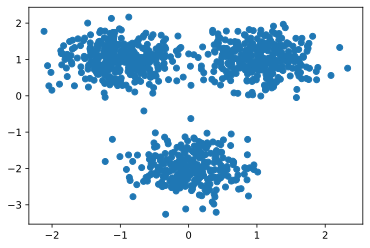

In [ ]:
X = m, n =  (1000, 2)
np.random.seed(1)
X = 0.4*np.random.randn(m,n)
Mu0 = np.array([[0,-2], [-1,1], [1,1]])
X += Mu0[np.random.choice(np.arange(3), m), :]
plt.scatter(X[:,0], X[:, 1])

También extenderemos el código anterior para este ejemplo en particular para trazar las medias del cúmulo en sus asignaciones en cada iteración del algoritmo.

In [ ]:
colors = np.array(["C0", "C1", "C2"])
def kmeans_visualize(X, k, max_iter=10, rand_seed=0):
    f,ax = plt.subplots(max_iter, figsize=(6.0, 4.6*max_iter))
    # Codigo para calcular los cluster
    np.random.seed(rand_seed)
    Mu = X[np.random.choice(X.shape[0],k),:]
    for i in range(max_iter):
        D = -2*X@Mu.T + (X**2).sum(axis=1)[:,None] + (Mu**2).sum(axis=1)
        y = np.argmin(D,axis=1)
        ax[i].scatter(X[:,0], X[:,1], c=colors[y])
        ax[i].scatter(Mu[:,0], Mu[:,1], c='k')
        
        Mu = np.array([np.mean(X[y==i],axis=0) for i in range(k)])
    loss = np.linalg.norm(X - Mu[np.argmin(D,axis=1),:])**2/X.shape[0]
    return Mu, y, loss

Vamos a ejecutar esto en nuestro simple ajuste de tres grupos.  Aquí mostramos las primeras cuatro iteraciones del algoritmo, después de las cuales ya ha convergido.

(array([[ 1.02977324,  1.01205231],
        [-1.00180266,  1.00576737],
        [ 0.03179906, -1.99482698]]),
 array([1, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 1, 1, 1, 2,
        0, 2, 1, 2, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 2, 2,
        0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 2, 0,
        0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 0,
        1, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 0, 1, 2, 2, 1, 2,
        2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1,
        2, 1, 2, 1, 0, 1, 0, 2, 1, 0, 0, 2, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0,
        0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 0,
        1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 2,
        2, 1, 1, 2, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0,
        0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2, 2, 1, 0, 1, 2, 0, 1, 1, 0,
        2, 1, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0,
  

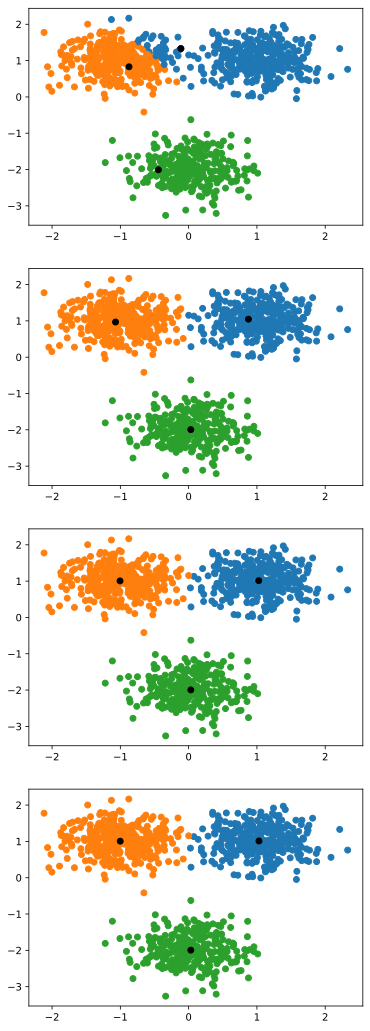

In [ ]:
kmeans_visualize(X, 3, max_iter=4, rand_seed=3)

Sin embargo, nótese que k-means es particularmente susceptible de quedarse atascado en el óptimo local.  Por ejemplo, con una inicialización aleatoria diferente, podemos obtener el siguiente comportamiento en su lugar.

(array([[ 0.49967099, -0.84051692],
        [-0.57016459,  1.0897333 ]]),
 array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 

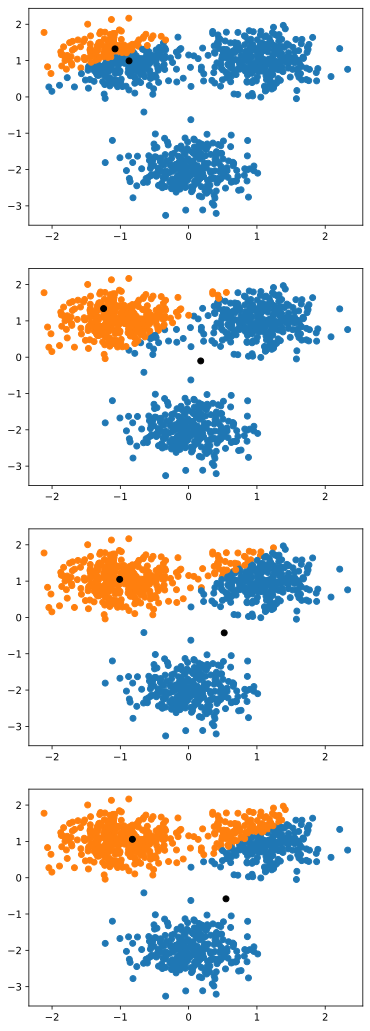

In [ ]:
kmeans_visualize(X, 2, max_iter=4, rand_seed=13)

### Seleccionando $k$

Una pregunta obvia que surge con este método es: ¿cómo elegimos los hiperparámetros para el algoritmo k-means, como el número de centros $k$?  Al igual que en el aprendizaje supervisado, no hay manera de evaluar directamente esto a partir de la pérdida de entrenamiento en sí; modulo la posibilidad de optima local, la pérdida debe seguir disminuyendo para un mayor número de centros (cuantos más centros, más cerca estará cualquier punto dado de ellos).  Pero, a diferencia del aprendizaje supervisado, no hay ni siquiera un buen análogo de la validación cruzada que podamos utilizar aquí: esta propiedad de menor pérdida se aplicará típicamente _también_ a un conjunto de validación.

Por esta razón, el proceso de selección del número de cúmulos es típicamente un arte impreciso, y es _muy_ difícil inferir algo sobre el número "real" de cúmulos en los datos a partir de la ejecución de k-means (de hecho, realmente nunca se debe intentar hacer esto).  Una estrategia común es más bien trazar la pérdida frente al número de cúmulos e intentar encontrar un punto que sea "suficientemente bueno" en términos de pérdida frente al número de cúmulos (es decir, en el que añadir cúmulos adicionales no ayude mucho).

Hagamos esto primero en nuestros ejemplos sintéticos.


Text(0, 0.5, 'Average loss')

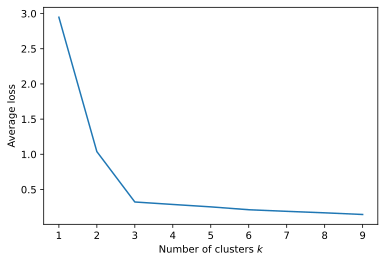

In [ ]:
losses = [kmeans(X,k,max_iter=10,rand_seed=0)[2] for k in range(1,10)]
plt.plot(range(1,10), losses)
plt.xlabel("Number of clusters $k$")
plt.ylabel("Average loss")

### Ejemplo: Dígitos escritos a mano

Como ejemplo, consideremos la tarea de agrupar imágenes de dígitos manuscritos del conjunto de datos del MNIST.  Este conjunto de datos se ha utilizado ampliamente como referencia en la comunidad de aprendizaje automático.

In [ ]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

ImportError: ignored

Las imágenes se ven de la siguiente manera.

Hagamos una prueba k-means con 30 centros en este conjunto de datos, y grafiquemos los centros resultantes (recuerde, estos centros están promediando imágenes juntas, por lo que los centros mismos se verán como imágenes razonables).

Sin embargo, una vez más, debemos subrayar que este es un método muy malo para "inferir" el número de cúmulos verdaderos en los datos (que en este caso son 10 imágenes diferentes).  Veamos qué sucede cuando intentamos ejecutar k-means con 10 cúmulos.

El "5" parece faltar en su mayor parte (posiblemente combinado con el "3", y hay una mezcla de "4", "7", "9" caracteres.  Si miráramos la pérdida sobre el número de cúmulos.  Esencialmente, lo que sucedió en nuestro ejemplo con algunos centros contenidos dentro de una sola clase, mientras que otros están dispersos en múltiples clases, es exactamente lo que está sucediendo aquí.  Una mejor inicialización como k-means++ y la ejecución de más iteraciones puede ayudar un poco, pero no arregla el problema fundamental.  Más bien, lo que está sucediendo es simplemente el hecho de que en el espacio de píxeles de estas imágenes, no es necesario que las diferentes imágenes se agrupen como quisiéramos: un "1" podría estar mucho más cerca en distancia de imagen de un "7" que de otro "1".


Si graficamos la pérdida sobre diferentes números de clústers obtenemos:

Definitivamente no seríamos capaces de decir que había 10 clases reales con sólo mirar esta trama.  El mensaje es que si alguien trata de afirmar que ejecutó k-medios (o realmente la mayoría de cualquier algoritmo de agrupación) para determinar que "hay" X número de cúmulos en los datos, uno puede dudar.  

## Uso cluster Sklearn

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

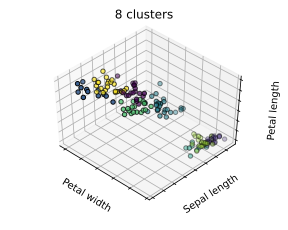

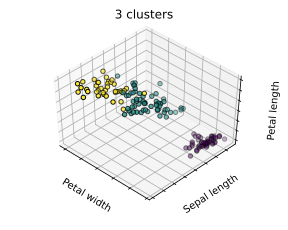

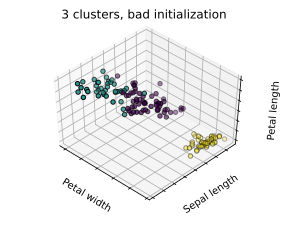

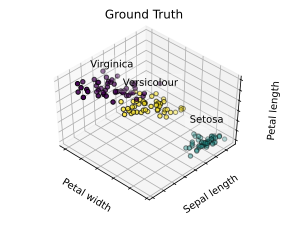

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
print(X)

y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()


In [ ]:
import pandas as pd

X = pd.read('aaa.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
/content/drive/My Drive/D-UCN/2030Engineering/Cotizaciones/Presupuesto por Impresoras 3D y Escaners 3D.xlsx

import pandas as pd

X = pd.read('/content/drive/My Drive/D-UCN/2030Engineering/Cotizaciones/Presupuesto por Impresoras 3D y Escaners 3D.xlsx')